<a href="https://colab.research.google.com/github/Dalton7718/deep-learning/blob/main/Apple_Stock_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
#READ DATA FROM TIINGO
df = pdr.get_data_tiingo("TSLA",api_key='2338c2d15973242e479e2623c925e0bf885160df')
#convert the data into a csv file
df.to_csv("TSLA.csv")
#read the first 5 columns
df.head()

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


close    high       low    open   volume  \
symbol date                                                                   
TSLA   2017-04-19 00:00:00+00:00  305.52  306.62  302.1100  302.46  3898024   
       2017-04-20 00:00:00+00:00  302.51  309.15  300.2300  306.51  6149352   
       2017-04-21 00:00:00+00:00  305.60  306.40  300.4200  302.00  4509756   
       2017-04-24 00:00:00+00:00  308.03  310.55  306.0215  309.22  5077561   
       2017-04-25 00:00:00+00:00  313.79  313.98  305.8600  308.00  6666406   

                                  adjClose  adjHigh   adjLow  adjOpen  \
symbol date                                                             
TSLA   2017-04-19 00:00:00+00:00    61.104   61.324  60.4220   60.492   
       2017-04-20 00:00:00+00:00    60.502   61.830  60.0460   61.302   
       2017-04-21 00:00:00+00:00    61.120   61.280  60.0840   60.400   
       2017-04-24 00:00:00+00:00    61.606   62.110  61.2043   61.844   
       2017-04-25 00:00:00+00:00    62.758   62.796  61.1720   61.600   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
TSLA   2017-04-19 00:00:00+00:00   19490120      0.0          1.0  
       2017-04-20 00:00:00+00:00   30746760      0.0          1.0  
       2017-04-21 00:00:00+00:00   22548780      0.0          1.0  
       2017-04-24 00:00:00+00:00   25387805      0.0          1.0  
       2017-04-25 00:00:00+00:00   33332030      0.0          1.0

In [3]:
#GET THE 'CLOSE' COLUMN
df1=df.reset_index()['close']

#print the first 5 rows
df1.head()

0    305.52
1    302.51
2    305.60
3    308.03
4    313.79
Name: close, dtype: float64

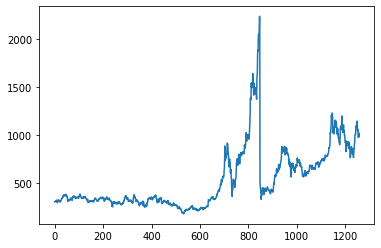

In [4]:
#plot the closing prices 
df1.plot()

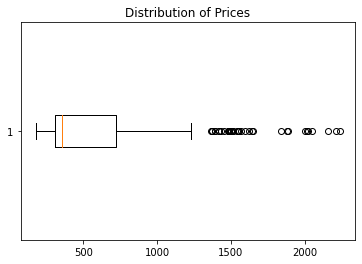

In [5]:
#create a boxplot
plt.boxplot(df1,vert = False)
plt.title("Closing Prices");
plt.title("Distribution of Prices");

In [6]:
#scale the data using min max
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
#split the data
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
#print the shape of the data
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [11]:
#print shape of the test data
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
#print the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
#fit the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 602ms/step - loss: 0.0067 - val_loss: 0.0033
Epoch 2/100
12/12 [==============================] - 4s 325ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 3/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 4/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 5/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 6/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7/100
12/12 [==============================] - 2s 167ms/step - loss: 9.0607e-04 - val_loss: 0.0032
Epoch 8/100
12/12 [==============================] - 2s 167ms/step - loss: 8.6813e-04 - val_loss: 0.0037
Epoch 9/100
12/12 [==============================] - 2s 172ms/step - loss: 8.5209e-04 - val_loss: 0.0016
Epoch 10/100
12/12 [==============================] - 2s 170ms/step - loss: 9.

In [17]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [18]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
#metrics
MSQ=math.sqrt(mean_squared_error(y_train,train_predict))
MAE = mean_absolute_error(y_train,train_predict)
print("Mean Squared Error:",MSQ)
print("Mean Absolute Error:",MAE)

Mean Squared Error: 436.96212530025264
Mean Absolute Error: 384.68698396409394


In [20]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

843.6016838861661

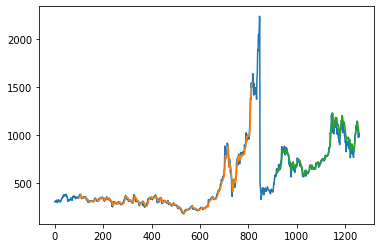

In [21]:
#plot the results
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
#lenth for the test data
len(test_data)

441

In [23]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [24]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [25]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4156339]
101
1 day input [0.45153366 0.45491752 0.43837206 0.46510792 0.46888017 0.44472225
 0.43967317 0.40586859 0.40297508 0.42372486 0.43208013 0.40044568
 0.40686869 0.38229325 0.37845789 0.38694424 0.3631213  0.36586432
 0.35002282 0.36875783 0.40290711 0.43112857 0.44420763 0.44155201
 0.4404451  0.4327501  0.42616687 0.49559176 0.47122508 0.44138209
 0.43001194 0.4116896  0.42681743 0.4298663  0.45016944 0.41392285
 0.42268592 0.41341308 0.39648895 0.39678995 0.3713649  0.36461661
 0.35898494 0.36821408 0.3156308  0.32400548 0.36787909 0.36522347
 0.35279981 0.34575052 0.36137354 0.35361543 0.3607327  0.36558759
 0.35226092 0.3306324  0.3382837  0.36094146 0.36140753 0.33857014
 0.32916622 0.31195565 0.2840449  0.3018769  0.30629485 0.33569605
 0.33275398 0.34028877 0.32057793 0.32009244 0.30372661 0.313349
 0.33013234 0.32009729 0.29924555 0.28517609 0.30242065 0.32103429
 0.33626407 0.35266873 0.36032489 0.39567818 0.39816874 0.40535882
 0.40376642 0.44318811 0.44694094 0.

In [26]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

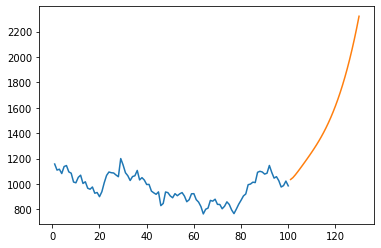

In [27]:
#plot the prediction
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


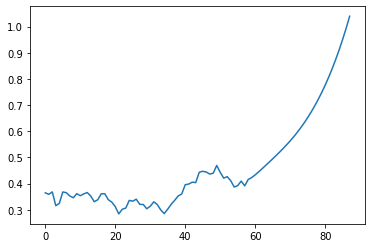

In [28]:
#create another plot
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


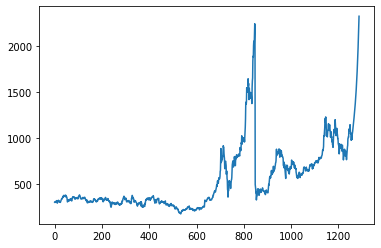

In [29]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3);